<a href="https://colab.research.google.com/github/EEdwardsA/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/DS_module_project_221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 604kB 8.6MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 3.1MB 13.1MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 296kB 30.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=1807987ce5b6a342b6071a562ba32303d4954102320ad4c6011bf681913a74ea
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=180c5cdc8d903ad48d25dc288ff883554ccddf9b5a3e93449f7749fc24657869
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imageh

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [2]:
import pandas as pd

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE
df = df.set_index('id')
# df = df.drop(columns=['quantity_group','extraction_type_group','payment_type'])
# df = df.drop(columns=['waterpoint_type_group'])
# df = df.drop(columns=['source_type'])
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


**Test 2**

In [3]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [4]:
target = 'status_group'

y = df[target]
X = df.drop(target, axis=1)

**Test 3**

In [5]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Test 4**

In [7]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [8]:
# YOUR CODE HERE

baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5429713804713805


**Task 5**

In [9]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [10]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
)

model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Test 6**

In [11]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [12]:
training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.9999789562289563
Validation Accuracy: 0.7059764309764309


**Test 7**

In [13]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [16]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id')

status_group = model.predict(X_test)
status_group

array(['functional', 'functional needs repair', 'non functional', ...,
       'functional', 'functional', 'non functional'], dtype=object)

In [19]:
submission = pd.DataFrame(status_group, columns=['status_group'], index=X_test.index)

In [20]:
submission.head()

,status_group
id,
50785,functional
51630,functional needs repair
17168,non functional
45559,non functional
49871,functional


**Test 8**

In [21]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [22]:
# YOUR CODE HERE
submission.to_csv('2020_10_05_Elizabeth.csv')

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

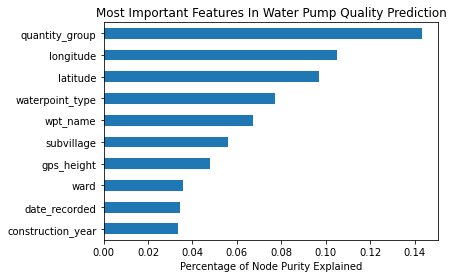

In [27]:
import matplotlib.pyplot as plt

tree = model.named_steps['decisiontreeclassifier']
features = X_train.columns
importances = tree.feature_importances_
feature_importances = pd.Series(importances, index=features).sort_values()
plt.xlabel('Percentage of Node Purity Explained')
plt.title('Most Important Features In Water Pump Status Prediction')
feature_importances.tail(10).plot(kind='barh');
